## PREDICTION OF CUSTOMER RESPONSE ON MARKETING CAMPAIGN USING ML MODELS

In this notebook, We will be building a model to predict the likelihood of a customer to give a positive response to purchase the Gold membership discount offer and also to identify the different factors which affect the customer's response. This prediction will enable the Superstore Marketing campaign to save cost and time on telephone engagement for the right set of customers.

## 1. PROBLEM DEFINITION
1. Predict the probability of a customer giving a positive response.

2. Analyze the factors that affect the customer's response



## 2. DATA

The data set is a Superstore Marketing campaign dataset dowloaded from Kaggle. This data set can be gotten from this link https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset?select=superstore_data.csv

#### 2. 1 Dataset description
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

YearBirth - Age of the customer 

Complain - 1 if the customer complained in the last 2 years 

DtCustomer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website


NumWebVisitsMonth - number of visits to company's website in the last month

Recency -




## 6. EXPERIMENTATION


In [115]:
!pip install catboost

In [116]:
#import the modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import the sklearn models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

#import metrics and experimental modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import  roc_auc_score,confusion_matrix, classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

import warnings

warnings.filterwarnings("ignore")






## Exploratory Data analysis

we will be looking at the relationship between diffferent data columns and rows

In [117]:
#read dataset
df = pd.read_csv("superstore_data.csv", parse_dates=["Dt_Customer"])

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11,0,34,2,3,1,2,7,1,0


In [118]:
#check shape of Dataframe

df.shape

(2240, 22)

We have 22 columns and 2240 rows.

In [119]:
#Transposed view of the Dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [120]:
#check for duplicated data
unique_count = len(df.drop_duplicates())
duplicate_count = len(df) - unique_count
f'{unique_count} distinct rows and {duplicate_count} duplicated rows'

'2240 distinct rows and 0 duplicated rows'

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

During the preprocessing stage, we would convert the object type values to numeric before we can train the model

In [122]:
#feature correlation

df.corr()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,-0.030128
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,-0.027225
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953


In [123]:
#check for missing data

df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [124]:
#fill missing income data with mean of income distribution

df.Income = df.Income.fillna(df.Income.mean())

In [125]:
df.Income.isna().sum()

0

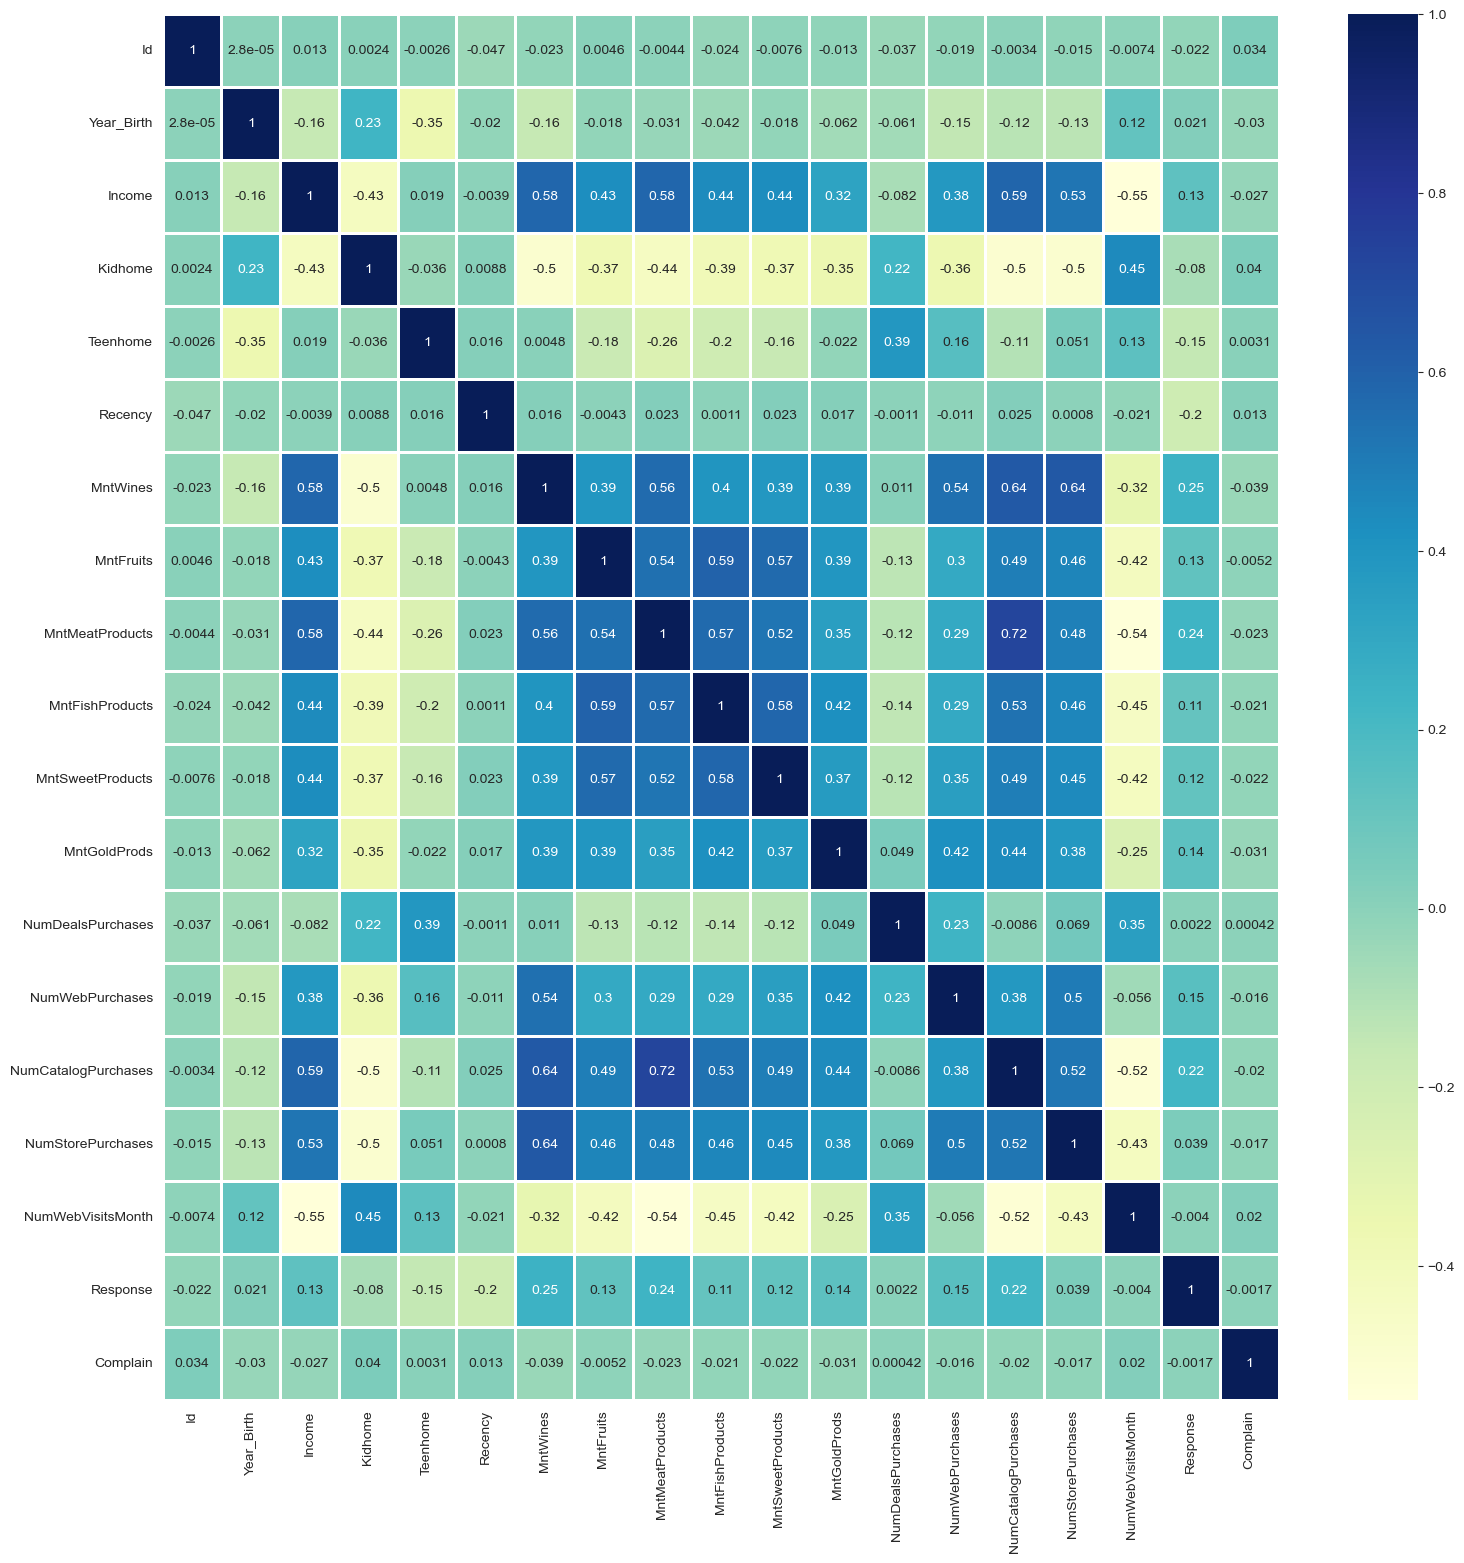

In [126]:
#correlation matrix graph

df_correlation = df.corr()

fig, ax= plt.subplots(figsize=(18,18))

ax= sns.heatmap(df_correlation, annot= True, linewidths= 2, cmap="YlGnBu")

## Matrix Analysis

* This matrix shows a complete  overview of the all feature correlation against the target 'Response'.

* Income plays a major role in the purchasing power of the customers. An increase in income leads to improve product purchase which somewhat influences customers response. However, It is important to note that age does not correlate with target response. This is rather strange, however we will investigate this further in subsequent analysis.

* It is worthy to note that customers who purchase Meat and Wine are more likely to respond positively(Response =1) to the Gold membership offer.

In [127]:
#check all columns
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [128]:
#check number of Responses

df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

## 4. EVALUATION/DATA PREPROCESSING

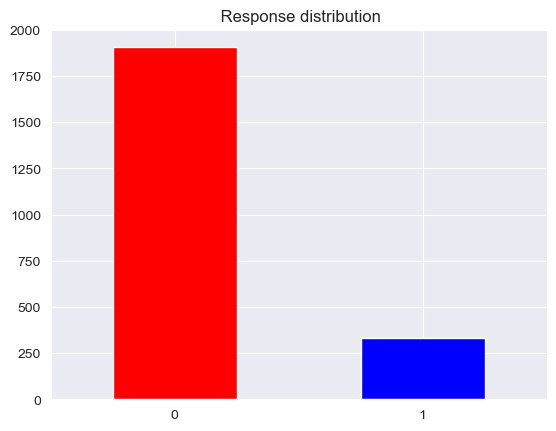

In [129]:
#Visual representation of Responses
df.Response.value_counts().plot(kind="bar", color = ["red", "blue"], title =" Response distribution")
plt.xticks(rotation=0);


In [131]:
#convert the date-year format to age(as at 2022)

df["Age"]= 2022 - df["Year_Birth"]


<AxesSubplot:>

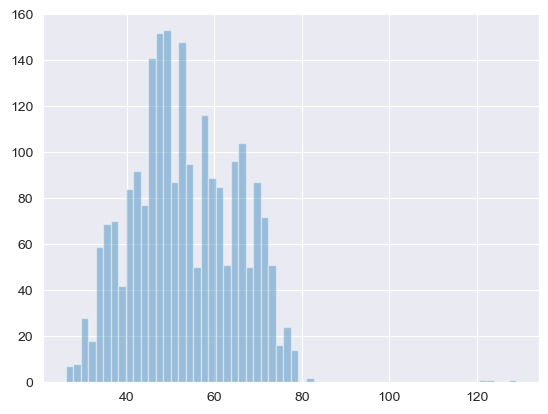

In [132]:
sns.set_style('darkgrid')

sns.distplot(x= df.Age,bins = 60, kde= False)

<AxesSubplot:xlabel='Complain', ylabel='count'>

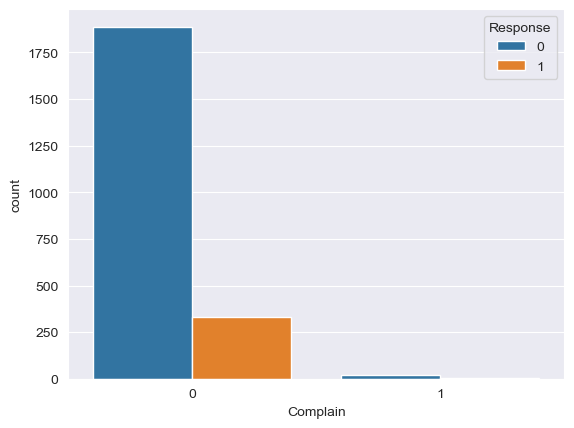

In [133]:
sns.countplot(data= df, x= 'Complain', hue= 'Response')

customers who do not complain may respond positively to the campaign discount offer.

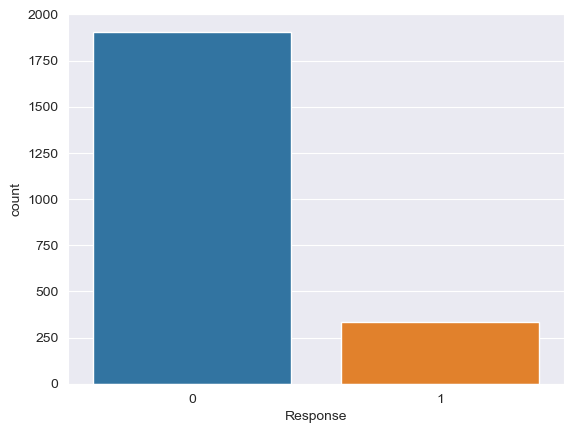

In [134]:
sns.countplot(data = df, x= 'Response');

Positive response is imbalanced and could cause biased performance, this would be corrected using the Random Oversampling the minority class (1) while training the dataset for better model performance.

## 4.DATA PREPROCESSING/ FEATURE ENGINEERING

In [135]:
#create a new age category using the age range

age_number = [10, 18, 40, 120]
age_grade = ['Teen', 'Adult', 'Elderly']

df["age_title"] = pd.cut(df.Age, bins = age_number, labels= age_grade)

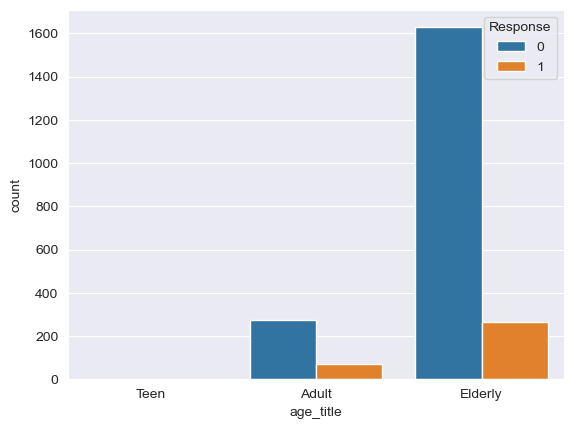

In [136]:
#visualize age category with regards to Response

sns.countplot(data = df, x= df["age_title"], hue = "Response");

People between the age of 40 to 120 yrs responded positively to the campaign discount

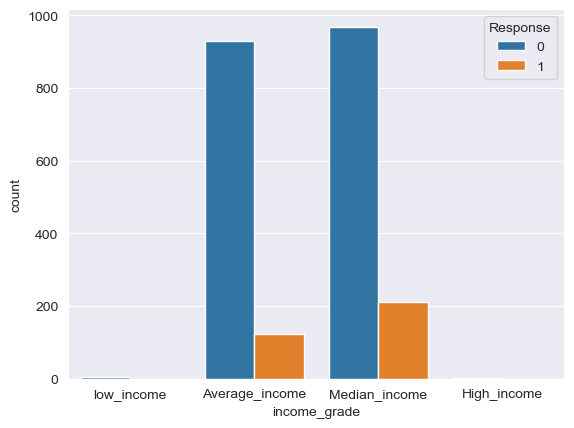

In [137]:

income_amount = [0, 5000, 50000, 500000, 1000000]
income_title = ['low_income', 'Average_income','Median_income' , 'High_income']

df["income_grade"] = pd.cut(df.Income, bins = income_amount, labels= income_title)

sns.countplot(data = df, x= df["income_grade"], hue = "Response");

In [138]:
df.income_grade.value_counts()

Median_income     1179
Average_income    1054
low_income           6
High_income          1
Name: income_grade, dtype: int64

Customers who fall under the Median income (50,000 to 500,000) are more likely to respond well to the campaign.

In [139]:

df[df.Income > 600000]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade
527,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,4,3,1,3,6,0,0,45,Elderly,High_income


In [140]:
df.drop(df[df.Income > 600000].index, inplace=True)

In [141]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,52,Elderly,Median_income
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,61,Elderly,Median_income
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,64,Elderly,Median_income
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,55,Elderly,Average_income
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,33,Adult,Average_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,5,2,11,4,0,0,46,Elderly,Median_income
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,1,1,0,3,8,0,0,45,Elderly,Average_income
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,2,6,1,5,8,0,0,46,Elderly,Average_income
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,1,5,4,10,3,0,0,44,Elderly,Median_income


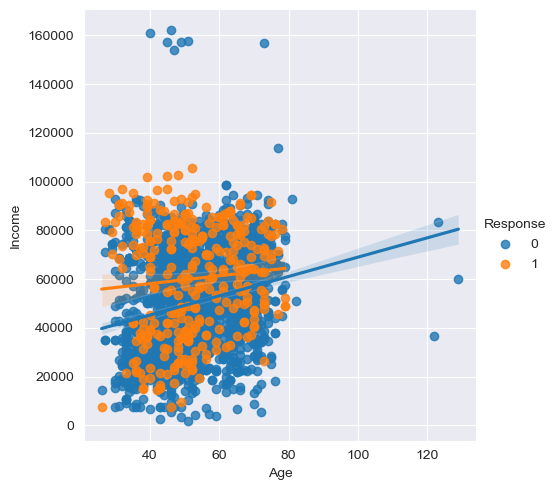

In [142]:
sns.lmplot(data=df, x= 'Age', y= "Income", hue ='Response')

<AxesSubplot:xlabel='income_grade', ylabel='Age'>

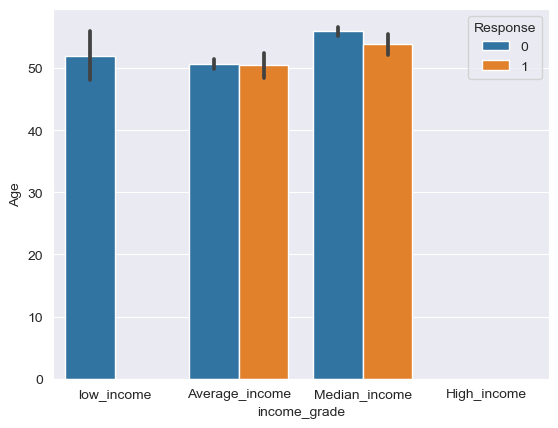

In [143]:
sns.barplot(data= df, x=df.income_grade, y= df.Age, hue= 'Response')

In [144]:
#cross-examine Age with Response
pd.crosstab(df.Age, df.Response).T


Age,26,27,28,29,30,31,32,33,34,35,...,75,76,77,78,79,81,82,122,123,129
Response,,,,,,,,,,,,,,,,,,,,,
0,1,4,2,3,12,11,14,29,27,21,...,12,13,6,6,4,1,1,1,1,1
1,1,1,1,2,1,4,4,1,2,6,...,4,3,2,1,3,0,0,0,0,0


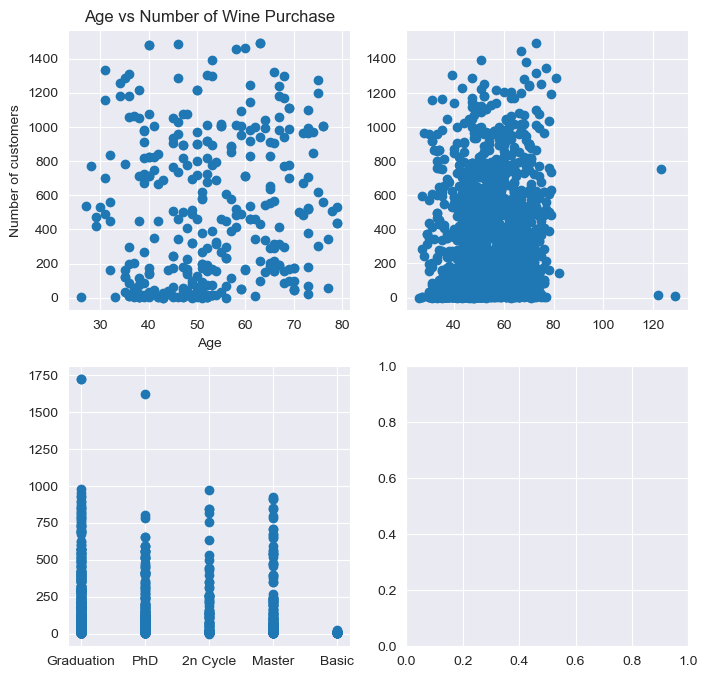

In [145]:

fig, ax= plt.subplots(2, 2, figsize=(8, 8))
ax[0,0].scatter(df.Age[df.Response ==1], df.MntWines[df.Response==1])
ax[0,0].set(title = "Age vs Number of Wine Purchase", ylabel= "Number of customers", xlabel= "Age")
ax[0,1].scatter(df.Age[df.Response ==0], df.MntWines[df.Response==0])
ax[1,0].scatter(df.Education[:1000], df.MntMeatProducts[:1000])
# ax[1,0].scatter(df.MntWines[df.Response==1], df.Income[df.Response ==1])

# sns.pairplot(df)

<AxesSubplot:ylabel='Density'>

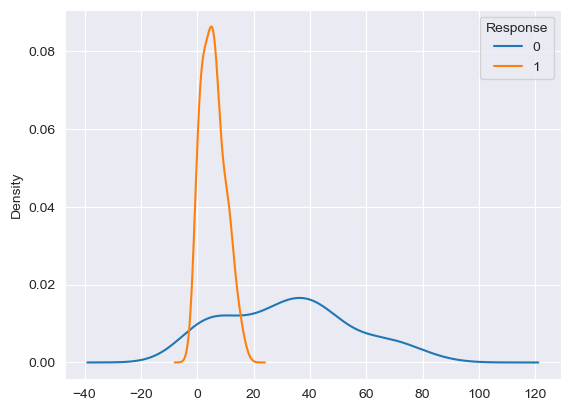

In [146]:
figsize = (5, 5)

pd.crosstab(df.Age, df.Response).plot(kind= "kde")

In [147]:
#drop column
df.drop("Year_Birth", axis =1, inplace= True)

In [148]:
df.Education.value_counts()

Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [149]:
#rename Feature value
df.replace("2n Cycle", "2nd Cycle Degree", inplace= True)
df.Education.value_counts()

Graduation          1126
PhD                  486
Master               370
2nd Cycle Degree     203
Basic                 54
Name: Education, dtype: int64

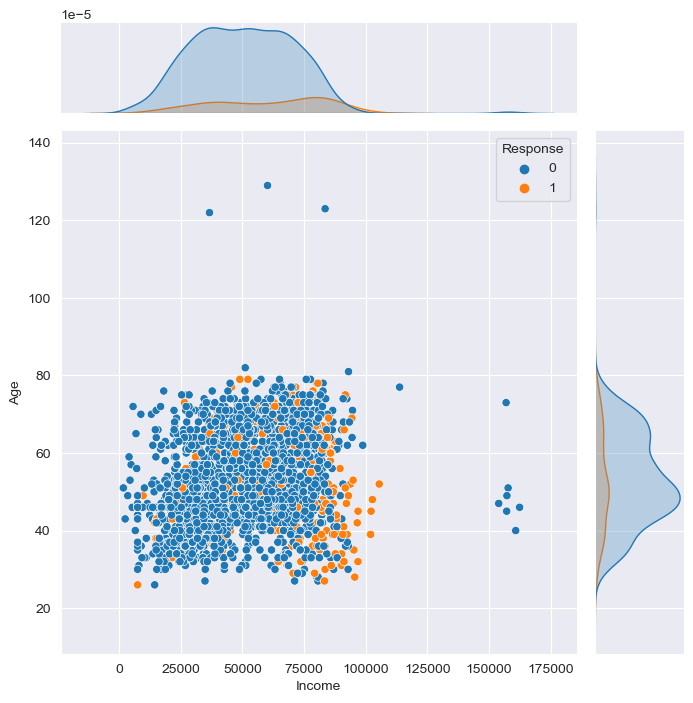

In [150]:
sns.jointplot(x= "Income", y= "Age", hue='Response', height= 7, data= df);

<AxesSubplot:xlabel='Education', ylabel='Income'>

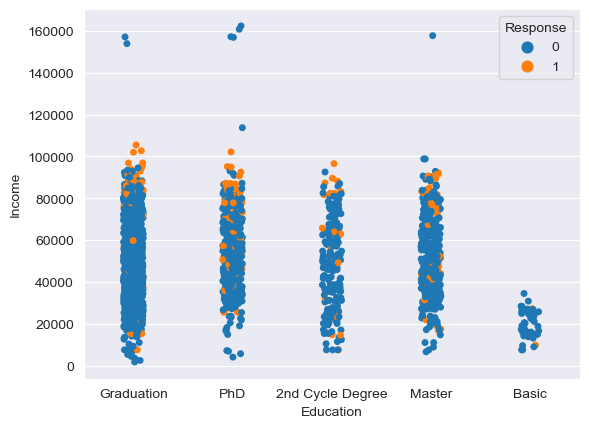

In [151]:
sns.stripplot(df.Education,df.Income, hue = df.Response)

<AxesSubplot:xlabel='Education', ylabel='Income'>

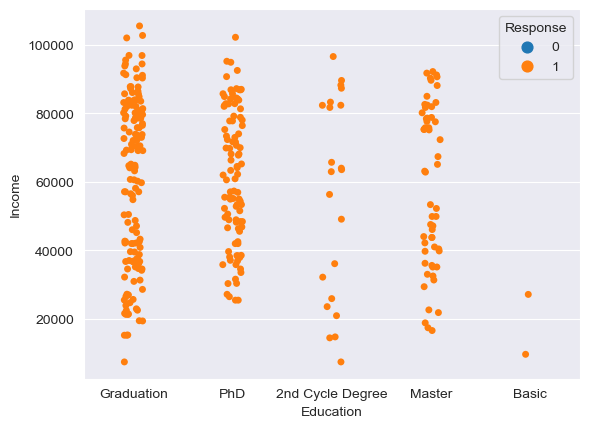

In [152]:
#comparing responses to Education Level

sns.stripplot(df.Education[df.Response ==1],df.Income[df.Response ==1], hue = df.Response)

In [153]:
df.head()

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,1,4,4,6,1,1,0,52,Elderly,Median_income
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,1,7,3,7,5,1,0,61,Elderly,Median_income
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,1,3,2,5,2,0,0,64,Elderly,Median_income
3,1386,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,1,1,0,2,7,0,0,55,Elderly,Average_income
4,5371,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,2,3,1,2,7,1,0,33,Adult,Average_income


In [154]:
#drop irrelevant column
df.drop("Id", axis = 1, inplace= True)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,1,4,4,6,1,1,0,52,Elderly,Median_income
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,7,3,7,5,1,0,61,Elderly,Median_income
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,1,3,2,5,2,0,0,64,Elderly,Median_income
3,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,...,1,1,0,2,7,0,0,55,Elderly,Average_income
4,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,...,2,3,1,2,7,1,0,33,Adult,Average_income


In [155]:
df["Year"] = df.Dt_Customer.dt.year
df["Month"] = df.Dt_Customer.dt.month


<AxesSubplot:xlabel='Year'>

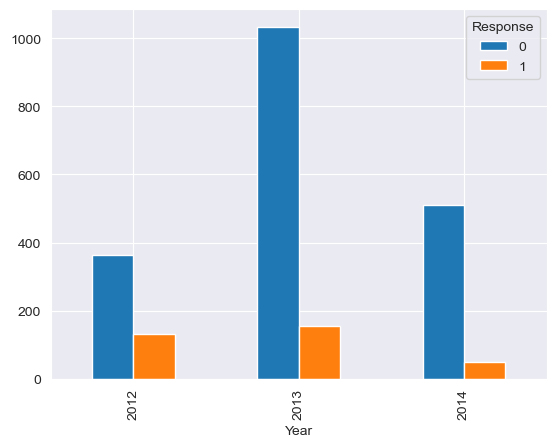

In [156]:
#cross-examine the positive responses made by year of customer`s registration
pd.crosstab(df.Year, df.Response).plot(kind= "bar")

There was a decline in the number of positive resonse in 2014 as compared to 2013

Text(0, 0.5, 'Number of Customers')

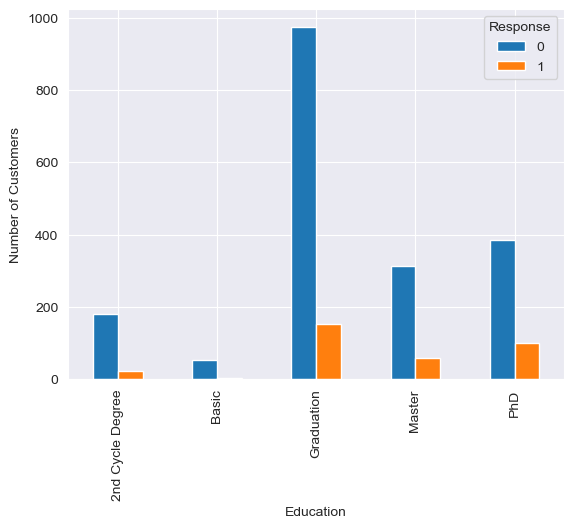

In [157]:
#cross_examine  effect of Education to Response
pd.crosstab(df.Education, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

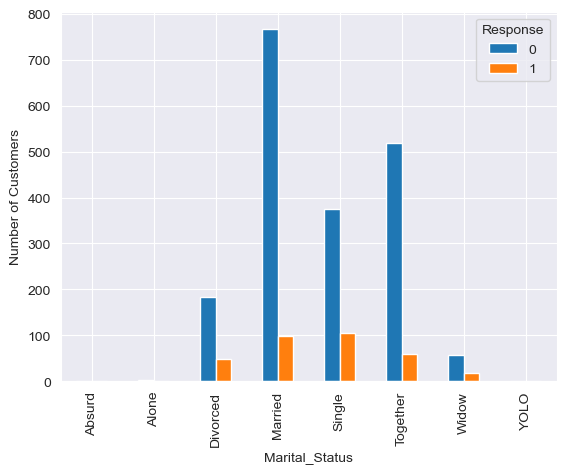

In [158]:
pd.crosstab(df.Marital_Status, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")

In [159]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age',
       'age_title', 'income_grade', 'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

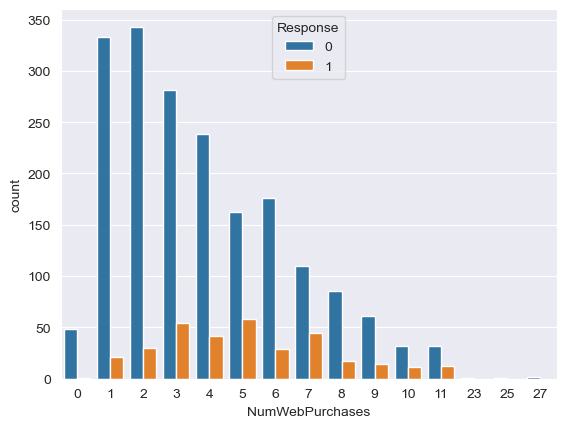

In [160]:
sns.countplot(data= df, x=df['NumWebPurchases'], hue= "Response")

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

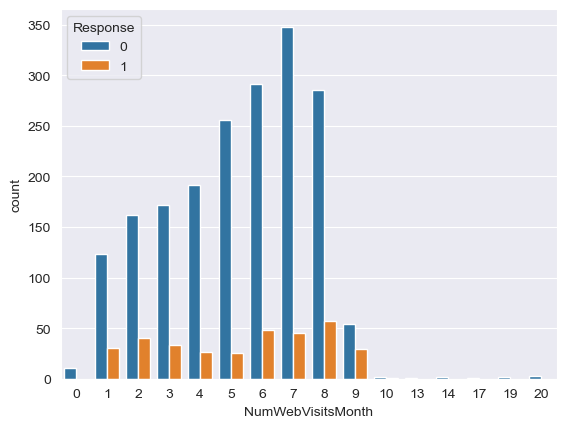

In [161]:
sns.countplot(data= df, x=df['NumWebVisitsMonth'], hue= "Response")

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

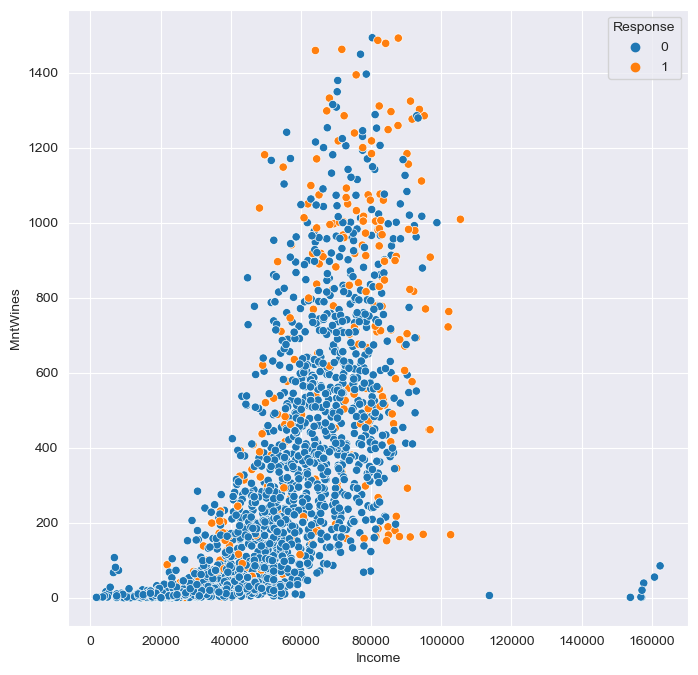

In [162]:
plt.figure(figsize=(8, 8))

sns.scatterplot(data= df, y=df['MntWines'], x= "Income" ,hue= "Response")

<AxesSubplot:xlabel='Year', ylabel='Recency'>

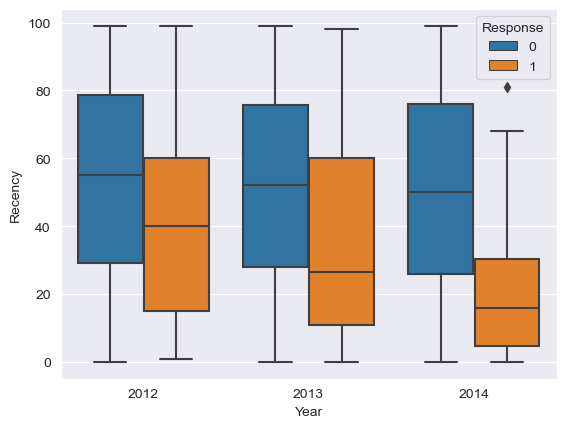

In [163]:
sns.boxplot( x= 'Year', y= 'Recency', data= df, hue= "Response")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2239 non-null   object        
 1   Marital_Status       2239 non-null   object        
 2   Income               2239 non-null   float64       
 3   Kidhome              2239 non-null   int64         
 4   Teenhome             2239 non-null   int64         
 5   Dt_Customer          2239 non-null   datetime64[ns]
 6   Recency              2239 non-null   int64         
 7   MntWines             2239 non-null   int64         
 8   MntFruits            2239 non-null   int64         
 9   MntMeatProducts      2239 non-null   int64         
 10  MntFishProducts      2239 non-null   int64         
 11  MntSweetProducts     2239 non-null   int64         
 12  MntGoldProds         2239 non-null   int64         
 13  NumDealsPurchases    2239 non-nul

In [165]:
df.drop("Dt_Customer", axis =1, inplace= True)

In [166]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade,Year,Month
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,4,6,1,1,0,52,Elderly,Median_income,2014,6
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,3,7,5,1,0,61,Elderly,Median_income,2014,6
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,2,5,2,0,0,64,Elderly,Median_income,2014,5
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,2,7,0,0,55,Elderly,Average_income,2014,11
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,1,2,7,1,0,33,Adult,Average_income,2014,8


In [167]:
#create an instance of LabelEncoder for each Catergory Column
label_Education= LabelEncoder()
label_Marital_Status= LabelEncoder()
label_age_title= LabelEncoder()
label_income_grade = LabelEncoder()

#fit the encoder
df.Education = label_Education.fit_transform(df.Education)
df.Marital_Status = label_Marital_Status.fit_transform(df["Marital_Status"])
df.age_title = label_age_title.fit_transform(df.age_title)
df.income_grade = label_income_grade.fit_transform(df.income_grade)



In [168]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade,Year,Month
0,2,2,84835.0,0,0,0,189,104,379,111,...,4,6,1,1,0,52,1,1,2014,6
1,2,4,57091.0,0,0,0,464,5,64,7,...,3,7,5,1,0,61,1,1,2014,6
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,5,2,0,0,64,1,1,2014,5
3,2,5,32474.0,1,1,0,10,0,1,0,...,0,2,7,0,0,55,1,0,2014,11
4,2,4,21474.0,1,0,0,6,16,24,11,...,1,2,7,1,0,33,0,0,2014,8


## 5. Modeling

In [169]:
lr = LogisticRegression()
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

# Combine the classifiers using VotingClassifier with majority voting
ensemble = VotingClassifier(estimators=[('lr', lr), ('AB', AB), ('GB', GB)],
                            voting='hard')



In [170]:
#checking for the best model

def check_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    model_score= model.score(x_test, y_test)
    return model_score

In [171]:
df_temp = df.copy()

df_temp

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,age_title,income_grade,Year,Month
0,2,2,84835.0,0,0,0,189,104,379,111,...,4,6,1,1,0,52,1,1,2014,6
1,2,4,57091.0,0,0,0,464,5,64,7,...,3,7,5,1,0,61,1,1,2014,6
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,5,2,0,0,64,1,1,2014,5
3,2,5,32474.0,1,1,0,10,0,1,0,...,0,2,7,0,0,55,1,0,2014,11
4,2,4,21474.0,1,0,0,6,16,24,11,...,1,2,7,1,0,33,0,0,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,2,11,4,0,0,46,1,1,2013,7
2236,0,3,31056.0,1,0,99,5,10,13,3,...,0,3,8,0,0,45,1,0,2013,1
2237,2,2,46310.0,1,0,99,185,2,88,15,...,1,5,8,0,0,46,1,0,2012,3
2238,2,3,65819.0,0,0,99,267,38,701,149,...,4,10,3,0,0,44,1,1,2012,11


## 5. MODELING

In [172]:
#split our data into x and y variable
y= df_temp.Response

x= df_temp.drop("Response", axis = 1)

In [173]:
x.shape, y.shape

((2239, 23), (2239,))

In [174]:
#split data into Train and test data
np.random.seed(43)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [175]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1791, 23), (1791,), (448, 23), (448,))

In [176]:
#this picks the best classifier with the highest score.
check_score(ensemble, x_train, x_test, y_train, y_test)

0.8727678571428571

In [177]:
for clf in (lr, AB, GB, ensemble):
    clf.fit(x_train, y_train)
    modelscore= clf.score(x_test, y_test)
    print("clf:" + str(clf), round(modelscore, 2))

clf:LogisticRegression() 0.85
clf:AdaBoostClassifier() 0.88
clf:GradientBoostingClassifier() 0.87
clf:VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('AB', AdaBoostClassifier()),
                             ('GB', GradientBoostingClassifier())]) 0.87


## 6. EXPERIMENTATION

1. RandomSearchCV
2. GridSearchCV

In [178]:
#RandomSearchCV on RandomForest classifier model

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [179]:
np.random.seed(56)

rs_lr= RandomizedSearchCV(lr,
                          param_distributions= param_grid,
                          cv=5,
                          n_iter=10,
                          verbose= True)

rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   verbose=True)

In [180]:
rs_lr.best_params_

{'penalty': 'l2', 'C': 0.01}

In [181]:
rs_lr= LogisticRegression(penalty= 'l2', C= 0.001)

rs_lr.fit(x_train, y_train)

LogisticRegression(C=0.001)

In [182]:
y_pred= rs_lr.predict(x_test)

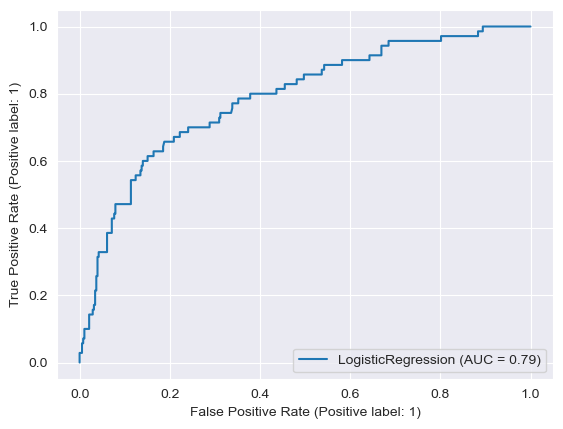

In [183]:
plot_roc_curve(rs_lr, x_test, y_test)

In [184]:
confusion_matrix(y_test, y_pred)

array([[368,  10],
       [ 60,  10]])

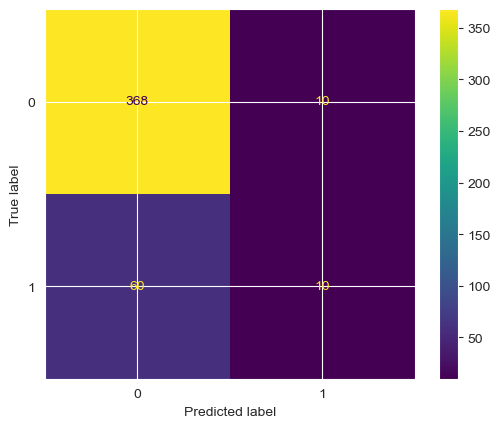

In [185]:
plot_confusion_matrix(rs_lr, x_test, y_test)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       378
           1       0.50      0.14      0.22        70

    accuracy                           0.84       448
   macro avg       0.68      0.56      0.57       448
weighted avg       0.80      0.84      0.81       448



## Analyze confusion matrix
For the benefit of this project, our goal is to improve the recall score so that the store will have more customers to engage vai phone calls who might purchase the membership discount offer. it appears we have more False Negatives which means alot of customers who may response well to the campaign were wrongly identified hence the need to reduce our False negative to increase the True positives.

While our precision score could further reduce, saving cost and time in engaging the right set of customer is most paramount. so let`s explore other hyperparameter tuning that could improve the recall score.


In [79]:
cv_recall =cross_val_score(rs_lr, x_test, y_test, cv= 5, scoring= "recall")

In [80]:
cv_recall

array([0.21428571, 0.28571429, 0.28571429, 0.28571429, 0.14285714])

In [81]:
#using GradientBoostClassifier model
np.random.seed(34)

GD =GradientBoostingClassifier()

GD.fit(x_train, y_train)


GradientBoostingClassifier()

In [82]:
pred_boost =GD.predict(x_test)

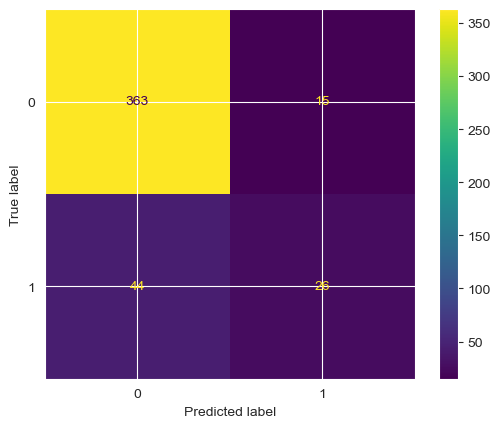

In [83]:
plot_confusion_matrix(GD, x_test,y_test)

In [84]:
print(classification_report(y_test, pred_boost))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       378
           1       0.63      0.37      0.47        70

    accuracy                           0.87       448
   macro avg       0.76      0.67      0.70       448
weighted avg       0.85      0.87      0.85       448



In [85]:
np.random.seed(40)

gradient =np.arange(5, 100, 10)
GB_list = []

for i in gradient:
    GB= GradientBoostingClassifier(n_estimators= i)
    GB.fit(x_train, y_train)
    test_score= GB.score(x_test, y_test)
    GB_list.append(test_score)
print(GB_list)
# print(f"The maximum score for the tuned model is {round(max(GB_list)* 100, 2)}%")

[0.84375, 0.859375, 0.8571428571428571, 0.8660714285714286, 0.8727678571428571, 0.8683035714285714, 0.8660714285714286, 0.8660714285714286, 0.8638392857142857, 0.8660714285714286]


In [187]:
#hyper parameter tuning for 

boost_grid ={"n_estimators": np.arange(10, 60, 10),
          "max_depth": [None, 3, 5],
          "min_samples_split": np.arange(2, 30, 10),
          "min_samples_leaf":np.arange(1, 2),
           "learning_rate": [0.2,0.01, 0.05] }

gs_boost= GridSearchCV(GD, param_grid= boost_grid, verbose=True)
gs_boost.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.01, 0.05],
                         'max_depth': [None, 3, 5],
                         'min_samples_leaf': array([1]),
                         'min_samples_split': array([ 2, 12, 22]),
                         'n_estimators': array([10, 20, 30, 40, 50])},
             verbose=True)

In [ ]:
gs_boost.best_params_

In [87]:
gs_boost = GradientBoostingClassifier(learning_rate= 1,
                                        max_depth= None,
                                      min_samples_leaf= 1,
                                      min_samples_split= 22,
                                      n_estimators= 60)
gs_boost.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=None,
                           min_samples_split=22, n_estimators=60)

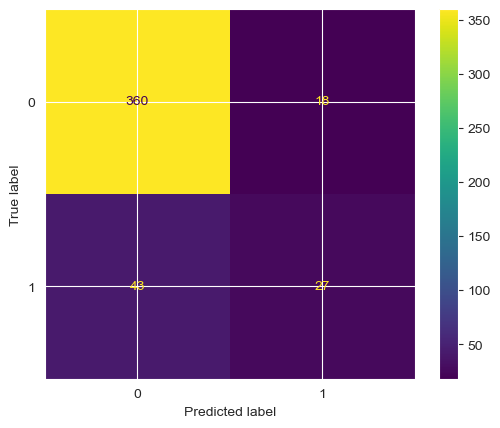

In [88]:
plot_confusion_matrix(gs_boost, x_test, y_test)

In [89]:
#using ADABoostClassifier model
np.random.seed(34)

Ada_model =AdaBoostClassifier( n_estimators=500,
    learning_rate=0.5)

Ada_model.fit(x_train, y_train)


AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

In [90]:
pred_Adaboost =Ada_model.predict(x_test)

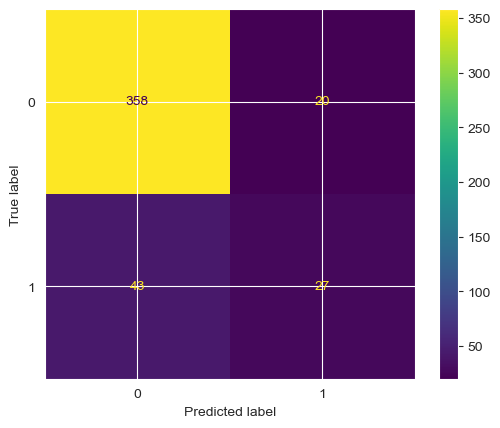

In [91]:
plot_confusion_matrix(Ada_model, x_test, y_test)

In [92]:
#Best model for the Marketing campaign

print(classification_report(y_test, pred_Adaboost))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       378
           1       0.57      0.39      0.46        70

    accuracy                           0.86       448
   macro avg       0.73      0.67      0.69       448
weighted avg       0.84      0.86      0.85       448



## 7. CONCLUSION

On an average, the ratio of this Precision score to recall to fi score is acceptable to build for the marketing campaign,  while we try to cut time and cost of telephone engagements.

ALso,SuperStore call agents would want to reach the right set of customers who would translate the calls to revenue when the membership discount offer is purchased. Hence, it is not advisable to sacrifice the precision score any further while maintaining an improved recall score.



## MODEL REWORKING WITH RandomOverSampler

- we will be using other model like xgboost and Catboost
- create training and validation dataset,  we will be over-sampling the dataset.
- show how it redflects on the confusion matrix
- optimize and fine tune the hyperparameter


##  our models so far
`rs_clf`
`gs_boost`
`Adaboost`

you can further use the catboost or xgboost if your model does not oprtimize further
using RandomOversampler before splitting the data, this might cause the model to overfit


## Lets resample the training dataset after it has been splitted in to test data, Training data and validation data

In [93]:
y= df_temp.Response

X= df_temp.drop("Response", axis = 1)

In [94]:
X.shape, y.shape

((2239, 23), (2239,))

In [95]:
#using standardscaler to put our data in the scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [96]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

# Further split the training set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [97]:
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')

X_sampl, y_sampl = ros.fit_resample(X_train, y_train)

In [98]:
X_sampl.shape, y_sampl.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1874, 23), (1874,), (471, 23), (471,), (672, 23), (672,))

In [99]:
def validation_model(model):
    model.fit(X_sampl, y_sampl)
    val_pred= model.predict(X_val)
    print(classification_report(y_val, val_pred))
    plot_confusion_matrix(model, X_val, y_val)
    
def test_model(model):
    model.fit(X_sampl, y_sampl )
    test_pred= model.predict(X_test)
    print(classification_report(y_test, test_pred))
    plot_confusion_matrix(model, X_test, y_test)   
    

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       402
           1       0.32      0.71      0.44        69

    accuracy                           0.74       471
   macro avg       0.63      0.73      0.64       471
weighted avg       0.85      0.74      0.77       471



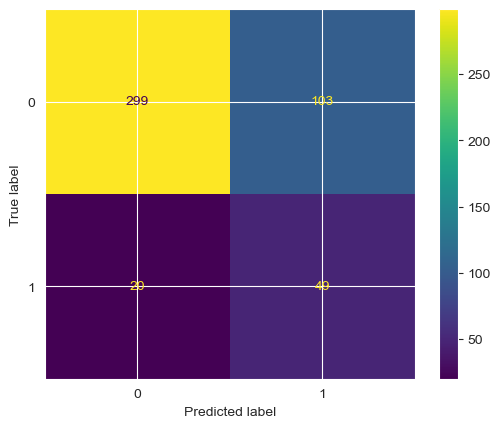

In [100]:
validation_model(rs_lr)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       566
           1       0.35      0.67      0.46       106

    accuracy                           0.75       672
   macro avg       0.64      0.72      0.65       672
weighted avg       0.83      0.75      0.78       672



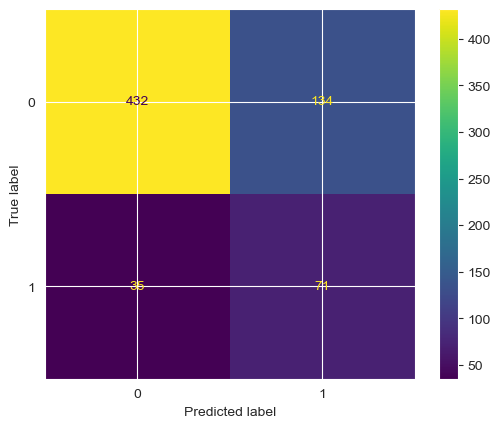

In [101]:
test_model(rs_lr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       402
           1       0.54      0.20      0.29        69

    accuracy                           0.86       471
   macro avg       0.71      0.59      0.61       471
weighted avg       0.83      0.86      0.83       471



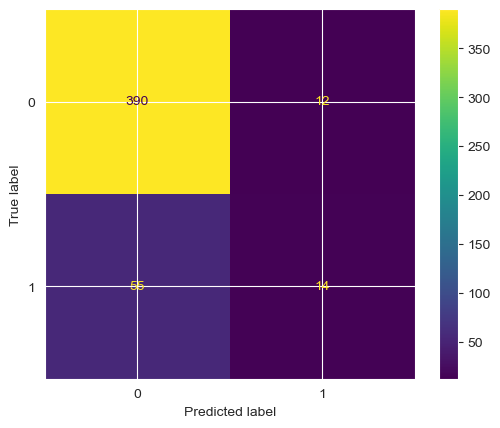

In [102]:
validation_model(gs_boost)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       566
           1       0.63      0.29      0.40       106

    accuracy                           0.86       672
   macro avg       0.76      0.63      0.66       672
weighted avg       0.84      0.86      0.84       672



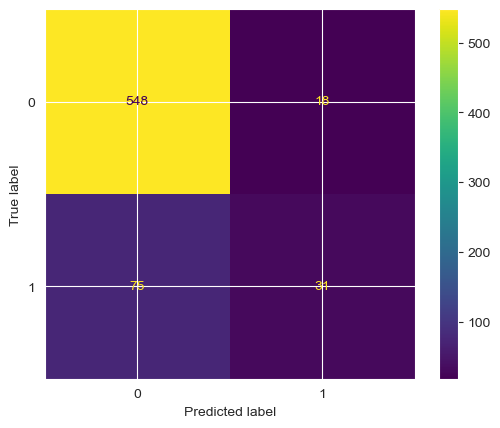

In [103]:
test_model(gs_boost)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       566
           1       0.51      0.62      0.56       106

    accuracy                           0.85       672
   macro avg       0.72      0.76      0.73       672
weighted avg       0.86      0.85      0.85       672



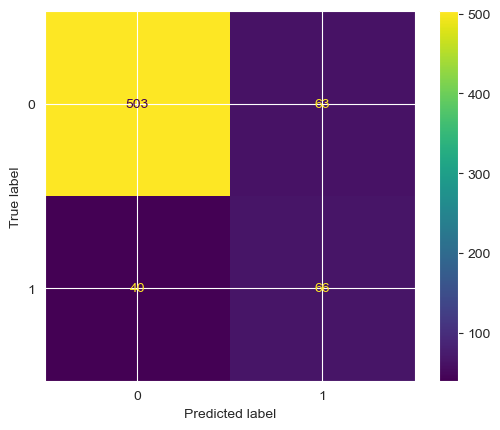

In [104]:
test_model(Ada_model)

In [105]:
X_test.shape, y_test.shape, X_val.shape, y_val.shape

((672, 23), (672,), (471, 23), (471,))

In [106]:
#AdaBoost seems to be more effective in improving the number of True Positive class to 76 customers.

In [107]:
from xgboost import XGBClassifier

xgb= XGBClassifier(n_estimator= 100, max_depth = 5)

[08:33:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       566
           1       0.62      0.47      0.54       106

    ac

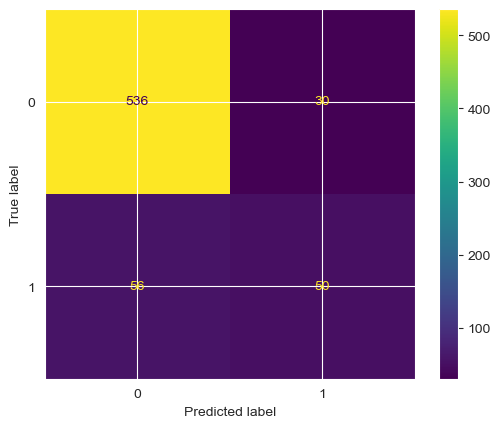

In [108]:
test_model(xgb)

0:	learn: 0.6897974	total: 67ms	remaining: 3.28s
1:	learn: 0.6853927	total: 68.7ms	remaining: 1.65s
2:	learn: 0.6808107	total: 70.2ms	remaining: 1.1s
3:	learn: 0.6770380	total: 71.6ms	remaining: 824ms
4:	learn: 0.6724023	total: 73ms	remaining: 657ms
5:	learn: 0.6681081	total: 74.4ms	remaining: 546ms
6:	learn: 0.6627523	total: 75.7ms	remaining: 465ms
7:	learn: 0.6580530	total: 77ms	remaining: 404ms
8:	learn: 0.6541621	total: 78.3ms	remaining: 357ms
9:	learn: 0.6509567	total: 79.5ms	remaining: 318ms
10:	learn: 0.6470702	total: 80.8ms	remaining: 286ms
11:	learn: 0.6439830	total: 82.7ms	remaining: 262ms
12:	learn: 0.6394918	total: 84ms	remaining: 239ms
13:	learn: 0.6360720	total: 86.1ms	remaining: 221ms
14:	learn: 0.6327839	total: 87.4ms	remaining: 204ms
15:	learn: 0.6296244	total: 89.4ms	remaining: 190ms
16:	learn: 0.6265237	total: 90.7ms	remaining: 176ms
17:	learn: 0.6232260	total: 92ms	remaining: 164ms
18:	learn: 0.6198977	total: 93.2ms	remaining: 152ms
19:	learn: 0.6160548	total: 94.4m

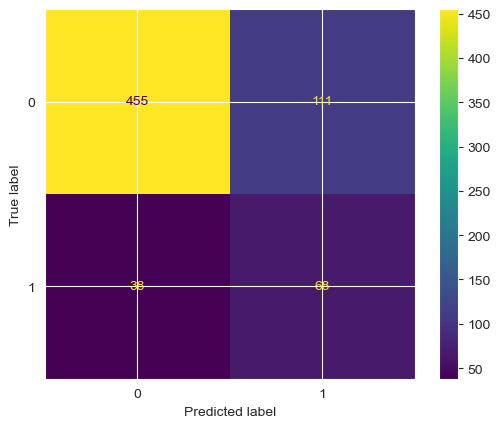

In [109]:
cat = CatBoostClassifier(iterations=50,
    learning_rate=0.01)
test_model(cat)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       566
           1       0.57      0.71      0.63       106

    accuracy                           0.87       672
   macro avg       0.76      0.80      0.78       672
weighted avg       0.88      0.87      0.87       672



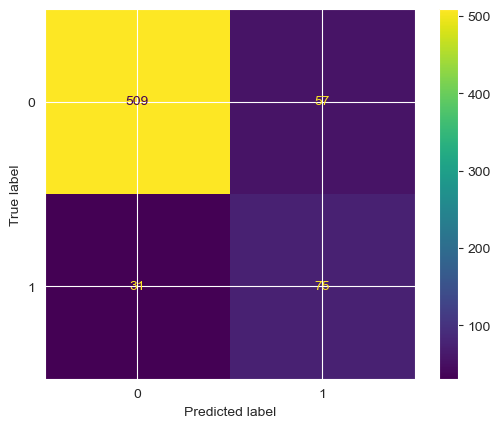

In [110]:
test_model(ensemble)

## CONCLUSION


* Education level also affects customer's decision, those who are PHD, Masters and Graduates are more likely to pay for the membership offer as they tend to have more disposable income. Hence, more resources on marketing campaigns should be focused on this groups.
* customers who do not complain may respond positively to the campaign discount offer, 
* More Customers registered in 2013, hence purchase of discount offer also increased in the same year,a focus on registering new customer is paramount.
* Age grade played a role on how customer may respond to the offer, People between the age of 40 to 100 yrs responded positively to the campaign discount
* Number of days since the last purchase(Recency), reduced in 2014 meaning more customer reduced value for Recency in 2014 would mean that the customer made a purchase more recently. This shows a more recent engagement with the business or product. However, the total positive response in 2014 is less than the previous year, This mean the store needs to focus on engaging these class of customer.
* Targeting customers with a lower number of days since their last purchase (more recent purchases) can be a strategy for offering discount promotions. Customers who have recently made a purchase are likely to be more engaged and receptive to promotional offers compared to those with a higher number of days since their last purchase.


- Using a VotingClassifier gave us much more data class to work with in terms of number of customers to engage from the test dataset. As you can see ffom the confusion matrix, we have about 75 customers in the True positive class who would translate to revenue after they have conatcted via Telephone call. Therefore, our recall score should be maintained at 71% without sacrificing the precision score any further.

## RECOMMENDATION

- Data Collection: Ensure that the data collection process is unbiased and representative of the real-world distribution of the classes you want to predict. Collect a sufficient number of samples for each class to avoid imbalances.

In [189]:
#save model for use

import pickle

with open('my_model.pkl', 'wb') as file:
    pickle.dump(ensemble, file)